In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
from CRp_gamma import Phi_pp_gamma, sigma_inel, sigma_single_pion, sigma_double_pion, avg_pi0_multiplicity, sigma_pion, gamma_diff_sigma, A_max, mod_sigma_inel, epsilon, T_p_ext

inelastic 

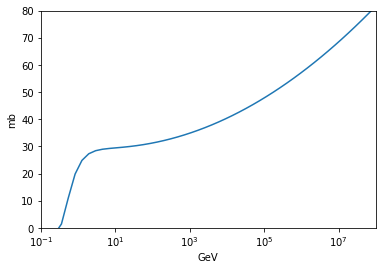

In [3]:
Tp = np.logspace(-1, 8, 50) #GeV
sinel = np.array([sigma_inel(T * 1e3) for T in Tp]) * 1e27 #mb
plt.plot(Tp, sinel)
plt.xlabel("GeV")
plt.ylabel("mb")
plt.xscale("log")
plt.xlim([1e-1, 1e8])
plt.ylim([0, 80])
plt.show()

single pion

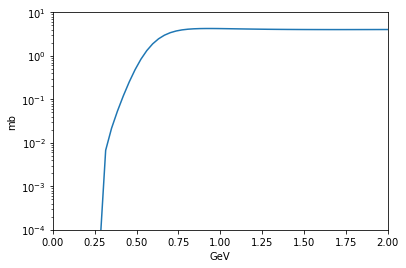

In [4]:
Tp = np.linspace(0.28, 2.0, 50) #GeV
s1pion = np.array([sigma_single_pion(T * 1e3) for T in Tp]) * 1e27 #mb
plt.plot(Tp, s1pion)
plt.xlabel("GeV")
plt.ylabel("mb")
plt.yscale("log")
plt.xlim([0, 2])
plt.ylim([1e-4, 10])
plt.show()

doubel pion

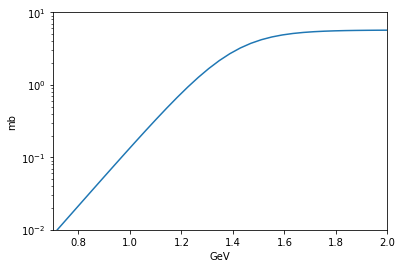

In [5]:
Tp = np.linspace(0, 2, 50) #GeV
s2pion = np.array([sigma_double_pion(T * 1e3) for T in Tp]) * 1e27
plt.plot(Tp, s2pion)
plt.xlabel("GeV")
plt.ylabel("mb")
plt.yscale("log")
plt.xlim([0.7, 2])
plt.ylim([1e-2, 10])
plt.show()

average pion multiplicity

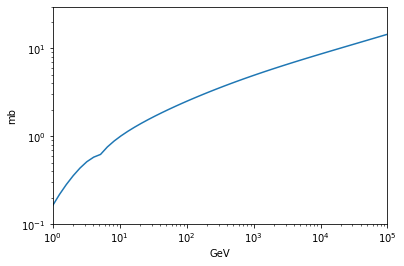

In [6]:
Tp = np.logspace(0, 5, 50)
avgmult = np.array([avg_pi0_multiplicity(T * 1e3) for T in Tp]) 
plt.plot(Tp, avgmult)
plt.xlabel("GeV")
plt.ylabel("mb")
plt.xscale("log")
plt.yscale("log")
plt.xlim([1, 1e5])
plt.ylim([0.1, 30])
plt.show()

inlcusive pion cross section

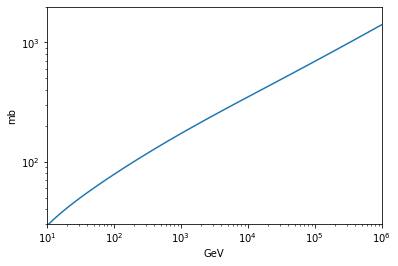

In [7]:
Tp = np.logspace(1, 6, 50)
sig = np.array([sigma_pion(T * 1e3) for T in Tp]) * 1e27
plt.plot(Tp, sig)
plt.xlabel("GeV")
plt.ylabel("mb")
plt.xscale("log")
plt.yscale("log")
plt.xlim([10, 1e6])
plt.ylim([3e1, 2e3])
plt.show()


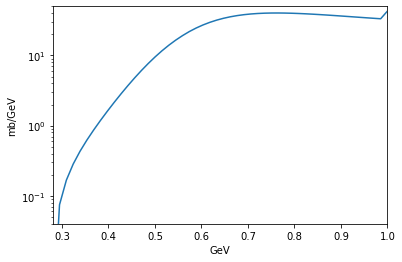

In [8]:
Tp = np.linspace(0.28, 1, 50)
Alist = np.array([A_max(T*1e3) for T in Tp]) * 1e30
plt.plot(Tp, Alist)
plt.yscale("log")
plt.xlabel("GeV")
plt.ylim([4e-2, 5e1])
plt.xlim([0.28, 1.0])
plt.ylabel("mb/GeV")
plt.show()

s-1 A

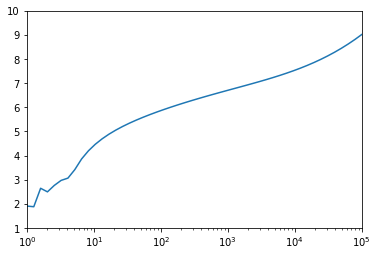

In [14]:
Tp = np.logspace(0, 5, 50)
sA = np.array([A_max(T * 1e3) / sigma_inel(T * 1e3) for T in Tp]) * 1e3
plt.plot(Tp, sA)
plt.xscale("log")
plt.xlim([1, 1e5])
plt.ylim([1, 10])
plt.show()

dsig/dE

/Users/ravikularaman/VScode/SN1006/sn-1006/CRp_gamma.py:419: RuntimeWarning: invalid value encountered in double_scalars
  F_p = (num**beta)/(den**gamma)


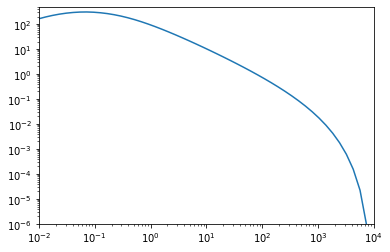

In [21]:
Eg = np.logspace(-2, 4, 50)
dsdE = np.array([gamma_diff_sigma(1e7, E*1e3, False) for E in Eg]) * 1e30
plt.plot(Eg, dsdE)
plt.xscale("log")
plt.yscale("log")
plt.xlim([1e-2, 1e4])
plt.ylim([1e-6, 5e2])
plt.show()

In [68]:
T_p_ext(1e-3)

(4613781.282087814, 1e+20)

epsilon

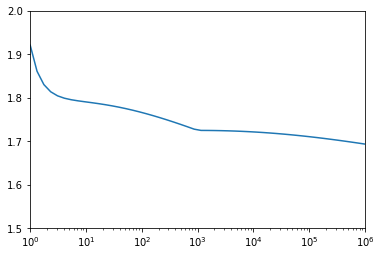

In [24]:
Tp = np.logspace(0, 6, 50)
eps = np.array([epsilon(T * 1e3) for T in Tp])
plt.plot(Tp, eps)
plt.xscale("log")
plt.xlim([1, 1e6])
plt.ylim([1.5, 2])
plt.show()

flux

In [76]:
m_p = 938.272 # in MeV, proton mass
from scipy.integrate import quad

def integrate(f, x_min, x_max, N_pts = 500):
    g = np.vectorize(f)
    if x_min==x_max:
        int_value=0
    else:
        if x_min == 0:
            z_min = np.log10(1e-50)
        else:
            z_min = np.log10(x_min)
        z_max = np.log10(x_max)
        int_range = np.log(np.logspace(z_min, z_max, N_pts))
        mid_points = (int_range[:-1]+int_range[1:])/2
        y_mid_points = np.exp(mid_points)*g(np.exp(mid_points))
        int_value = np.sum(y_mid_points*np.diff(int_range))
    return int_value

def Jp(T):
    p = np.sqrt((T + m_p) ** 2 - (m_p ** 2))
    dp_on_dT = (T + m_p)/p
    return 4 * np.pi * (p ** 2.0) * (1/np.power(p, 2.0)) * np.exp(-p/1e7) * dp_on_dT

def Phi_gamma(E_gamma):
    # E_gamma in MeV
    def integrand(T):
        # T in MeV
        g_diff_sigma = gamma_diff_sigma(T, E_gamma, True) # in cm2 MeV-1
        f_in = Jp(T) # MeV-1 cm-3 to  MeV-1 cm-2 s-1 sr-1
        return g_diff_sigma * f_in # MeV-2 s-1 sr-1
    T_p_min, T_p_max = T_p_ext(E_gamma)
    #T_p_min = 0.28e3
    #T_p_max = 1e12
    integ = integrate(integrand, T_p_min, T_p_max) # MeV-1 s-1 sr-1
    emi = 4 * np.pi * 1 * integ # MeV^-1 cm^-3 s^-1 
    return E_gamma * E_gamma * emi # MeV cm-3 s-1

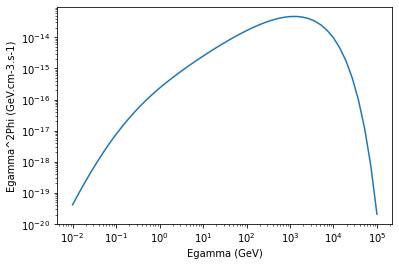

In [ ]:
Eg = np.logspace(-2, 5, 50)
E2Phi = np.array([Phi_gamma(E * 1e3) for E in Eg]) * 1e-3
plt.plot(Eg, E2Phi)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Egamma (GeV)")
plt.ylabel("Egamma^2Phi (GeV.cm-3.s-1)")
plt.show()

In [96]:
c = 3e10 
def velocity(E_kin, rest_mass):
    E_kin = E_kin
    rest_mass = rest_mass
    gamma = 1+(E_kin/rest_mass)
    beta = np.sqrt(1-(1/(gamma**2)))
    v = c*beta
    return v, beta, gamma

def J_CRp(T_p, del_p, Ap, Tp_c):
    # Gives spectrum in MeV-1 cm-3
    v = velocity(T_p, m_p)[0]
    p2 = (T_p ** 2) + (2 * T_p * m_p) # MeV2
    p2_GeV = 1e-6 * p2 #GeV2
    return (4 * np.pi / v) * Ap * np.power(p2_GeV, -del_p / 2) * np.exp(- T_p / Tp_c)

def Phi_gamma_test(E_gamma, J_CRp, del_p, Ap, Tp_c, n):
    # E_gamma in MeV
    def integrand(T):
        # T in MeV
        v = velocity(T, m_p)[0]
        g_diff_sigma = gamma_diff_sigma(T, E_gamma, True) # in cm2 MeV-1
        f_in = v * J_CRp(T, del_p, Ap, Tp_c) / (4 * np.pi) # MeV-1 cm-3 to  MeV-1 cm-2 s-1 sr-1
        return g_diff_sigma * f_in # MeV-2 s-1 sr-1
    T_p_min, T_p_max = T_p_ext(E_gamma)
    integ = integrate(integrand, T_p_min, T_p_max) # MeV-1 s-1 sr-1
    emi = 4 * np.pi * n * integ # MeV^-1 cm^-3 s^-1 
    return E_gamma * E_gamma * emi # MeV cm-3 s-1

/Users/ravikularaman/VScode/SN1006/sn-1006/CRp_gamma.py:419: RuntimeWarning: invalid value encountered in double_scalars
  F_p = (num**beta)/(den**gamma)


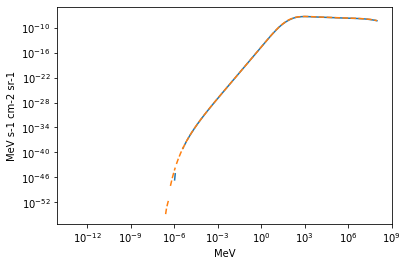

In [98]:
pgamma_Minh = np.genfromtxt(open("gamma_SN1006.txt", "r"), delimiter=',') 
E_MeV, gamma_flux = pgamma_Minh[:,0] * 1e-6, pgamma_Minh[:,1] * 1e-6
del_p, Ap, Tp_c = 2.2, 1.63, 1e9
emi_pre_sh = V_sh / (4 * np.pi * ((2.2 * 3e21) ** 2)) # cm
Phiss = np.array([emi_pre_sh * Phi_gamma_test(E, J_CRp, del_p, Ap, Tp_c, 0.12) for E in E_MeV])
plt.plot(E_MeV, gamma_flux)
plt.plot(E_MeV, Phiss, linestyle='dashed')
plt.xlabel("MeV")
plt.ylabel("MeV s-1 cm-2 sr-1")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [100]:
from CRe_gamma_radio import sigma_scat, Phi_e_rel_brem

In [102]:
def J_CRe(T_e, del_e, Ae, Te_c):
    # Gives spectrum in MeV-1 cm-3
    v = velocity(T_e, m_e)[0]
    p2 = (T_e ** 2) + (2 * T_e * m_e) #MeV2
    p2_GeV = 1e-6 * p2
    return (4 * np.pi / v) * Ae * np.power(p2_GeV, -del_e / 2) * np.exp(- T_e / Te_c)

In [101]:
sig_brem = 3.4e-26 # cm2

def Phi_brem_test(E, J_CRe, del_e, Ae, Te_c, n):
    def integrand(T_e):
        sig = sig_brem / E  # in cm2 MeV-1
        F = J_CRe(T_e, del_e, Ae, Te_c) # in MeV-1 cm-3
        return sig * F # in cm-1 MeV-2
    integ = integrate(integrand, E, 1e12) # in MeV-1 cm-1
    emi = n * c * integ  # MeV-1 cm-3 s-1
    return E * E * emi * MeV_to_erg #erg cm-3 s-1

/Users/ravikularaman/VScode/SN1006/sn-1006/CRe_gamma_radio.py:81: RuntimeWarning: invalid value encountered in log
  log_term = np.log((2 * E_e / m_e) * ((E_e - E_gamma) / E_gamma))


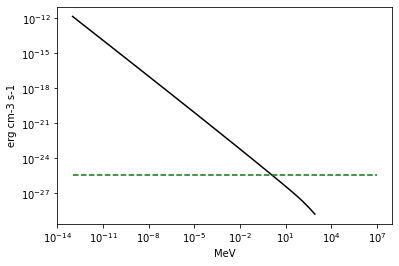

In [107]:
sig_brem_full = np.array([sigma_scat(E, 1e3) for E in Eg])
sig_brem_simple = np.array([sig_brem for E in Eg])
plt.plot(Eg, sig_brem_full, color='black')
plt.plot(Eg, sig_brem_simple, color='green', linestyle='dashed')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("MeV")
plt.ylabel("erg cm-3 s-1")
plt.show()

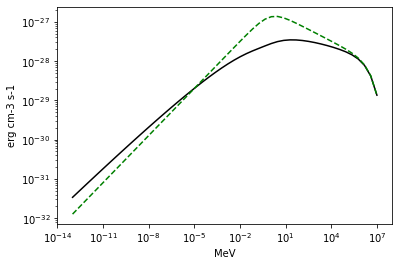

In [106]:
m_e = 0.511  # in MeV
MeV_to_erg = 1.602e-6 
del_e, Ae, Te_c = 2.2, 7.47e-3, 1e7
Eg = np.logspace(-13, 7, 50)
Phi_brem_full = np.array([Phi_e_rel_brem(E, J_CRe, del_e, Ae, Te_c, 0.12) for E in Eg])
Phi_brem_simple = np.array([Phi_brem_test(E, J_CRe, del_e, Ae, Te_c, 0.12) for E in Eg])
plt.plot(Eg, Phi_brem_full, color='black')
plt.plot(Eg, Phi_brem_simple, color='green', linestyle='dashed')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("MeV")
plt.ylabel("erg cm-3 s-1")
plt.show()

In [108]:
from CRe_gamma_radio import Phi_e_syn

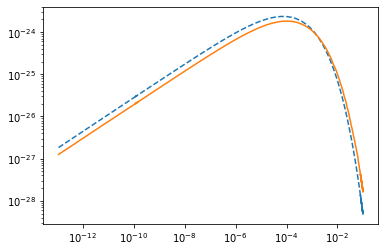

In [121]:
del_e, Ae, Te_c = 2.2, 7.47e-3, 1e7
syn_Minh = np.genfromtxt(open("synchrotron_SN1006.txt", "r"), delimiter=',') 
E_MeV, syn_flux = syn_Minh[:, 0] * 1e-6, (4 * np.pi * ((2.2*3e21) ** 2) / V_sh) * syn_Minh[:, 1]
#cm and erg s-1 
Phi_syn_sh = np.array([Phi_e_syn(E, J_CRe, del_e, Ae, Te_c, 26e-3) for E in E_MeV])
plt.plot(E_MeV, Phi_syn_sh, linestyle='dashed')
plt.plot(E_MeV, syn_flux)
plt.xscale("log")
plt.yscale("log")
plt.show()

In [114]:
from CRe_gamma_radio import Phi_e_IC

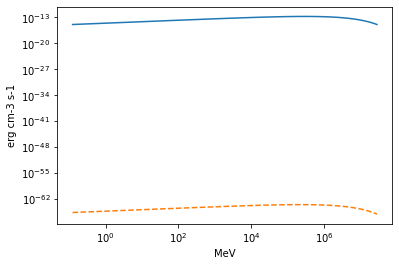

In [134]:
IC_Minh =  np.genfromtxt(open("IC_SN1006.txt", "r"), delimiter=',') 
T_CMB, w_CMB = 2.72, 0.261
sigma_sb=35.394474508 #MeV cm^-2 s^-1 K^-4
k_CMB = w_CMB * c / (sigma_sb * (T_CMB ** 4))
E_MeV, IC_flux = IC_Minh[:,0] * 1e-6, IC_Minh[:,1]
Phi_IC_sh_CMB = np.array([(1 / (4 * np.pi * ((2.2*3e21) ** 2))) * Phi_e_IC(E, J_CRe, del_e, Ae, Te_c, T_CMB, k_CMB) for E in E_MeV])
plt.plot(E_MeV, IC_flux)
plt.plot(E_MeV, Phi_IC_sh_CMB, linestyle='dashed')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("MeV")
plt.ylabel("erg cm-3 s-1")
plt.show()